### <b>K-Means clustering (Unsupervised learning) - Author of algorithm: MacQuen in 1967</b>

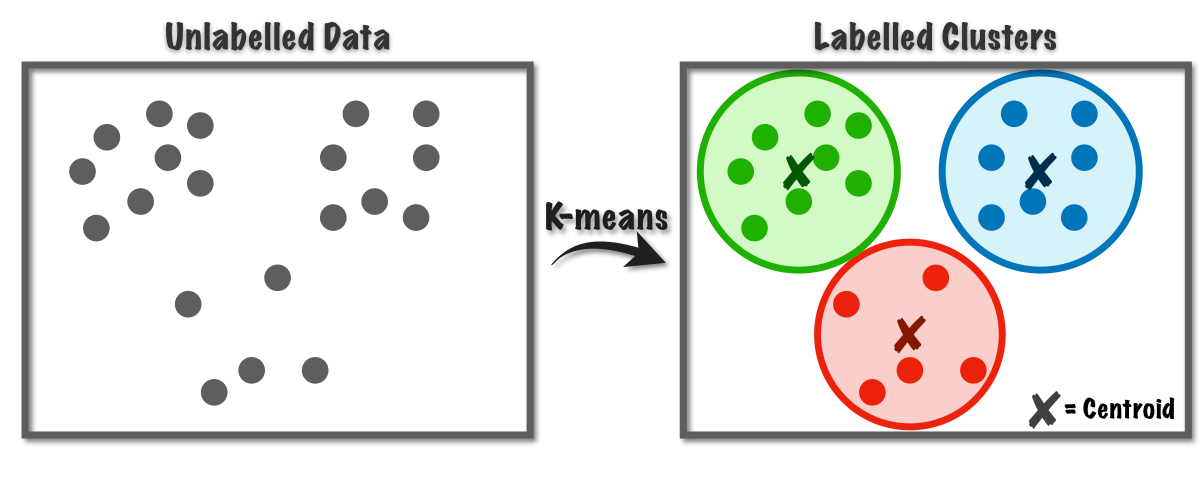
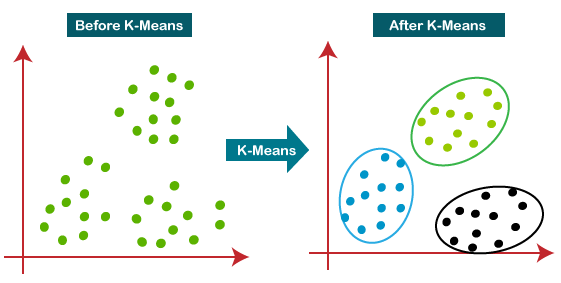
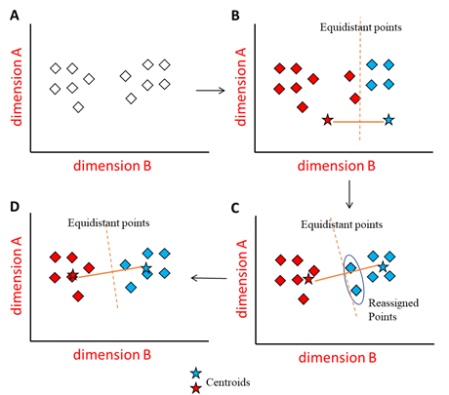
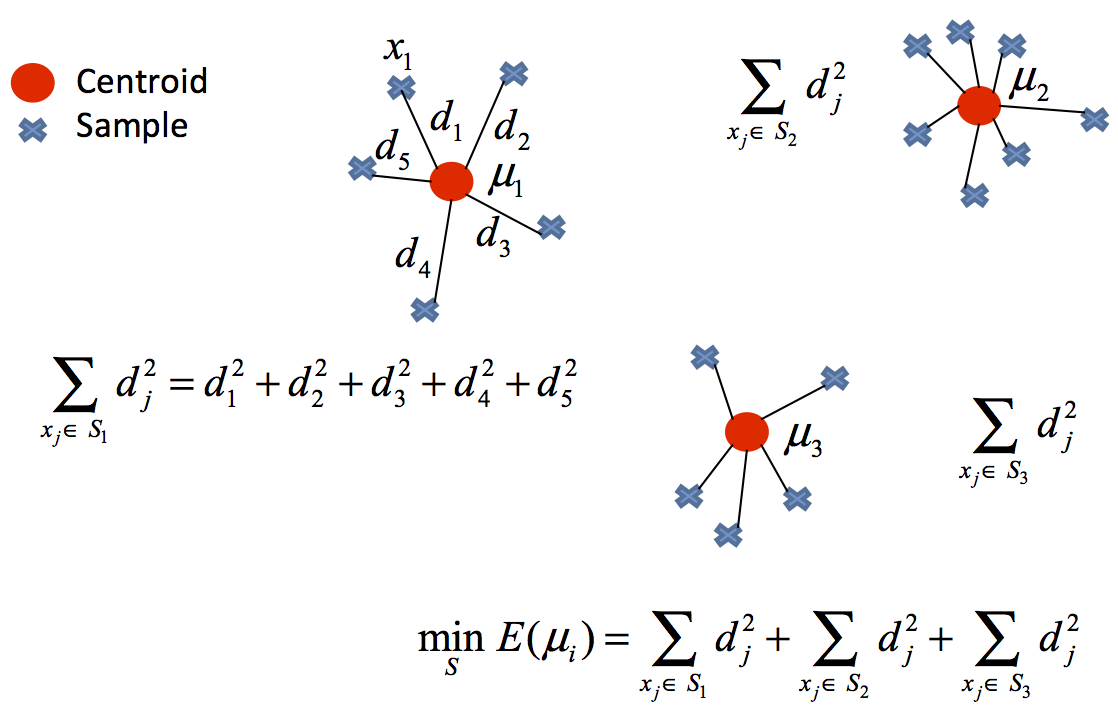
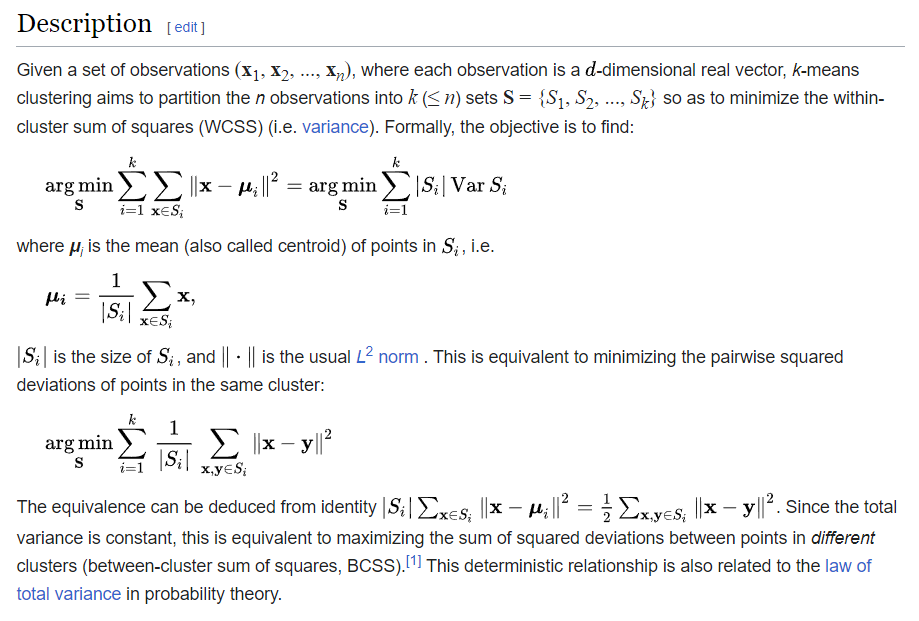
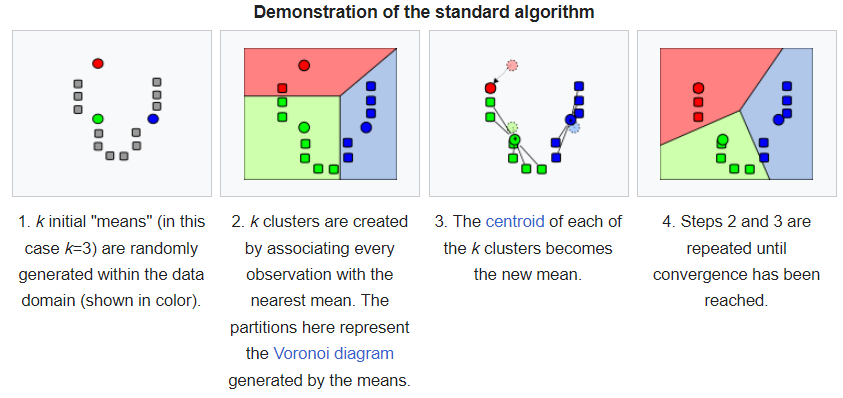
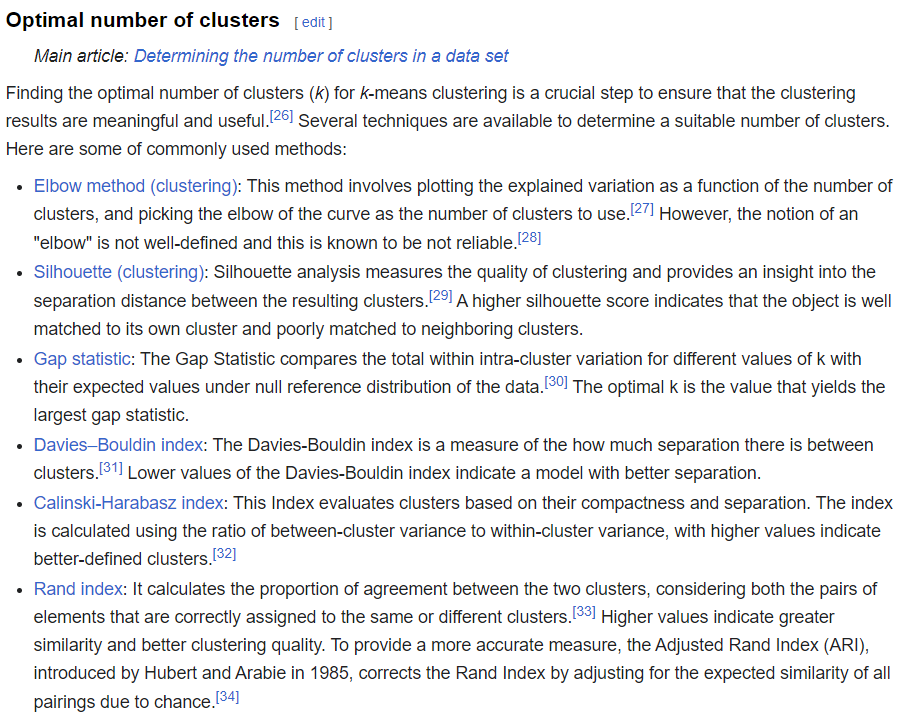

### <b>1. Data preprocessing</b>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [85]:
dataset = pd.read_csv("Mall_Customers.csv")

print(dataset)

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, [3, 4]].values

print(f"X: \n{X}")

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Description: 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.0

### <b>2. Elbow method for searching the K/number of clusters</b>

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

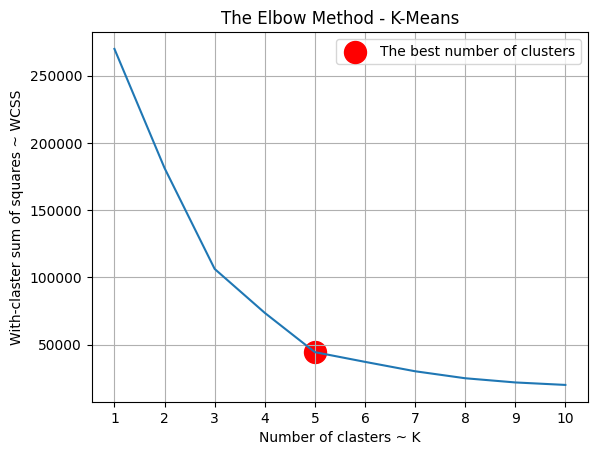

In [51]:
within_claster_sum_of_squares = [] # WCSS (distance to each centroid within group)
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # 42 is a lucky number ;)
    k_means.fit(X)
    within_claster_sum_of_squares.append(k_means.inertia_)

plt.plot(range(1, 11), within_claster_sum_of_squares)
plt.xlabel("Number of clasters ~ K")
plt.ylabel("With-claster sum of squares ~ WCSS")
plt.xticks(range(1, 11))
plt.title("The Elbow Method - K-Means")
plt.grid(True)
plt.scatter(5, within_claster_sum_of_squares[4], s=250, color="red", label="The best number of clusters")
plt.legend()
plt.show()

### <b> 3. Training the K-Means model on the dataset ~ creating the dependent variable (y)</b>

In [83]:
the_best_number_of_clusters = 5
k_means_model = KMeans(n_clusters = the_best_number_of_clusters, init = "k-means++", random_state = 42)
k_means_model.fit(X)

y = k_means_model.predict(X) # creating the dependent variable

print(f"y (dependent variable): \n{y}\n")

k_means_inertia_score = k_means_model.inertia_
k_means_centroids = k_means_model.cluster_centers_

print(f"Inertia score (Within-Cluster sum of squares - WCSS) = {k_means_inertia_score}\n")
print(f"K-Means centroids = \n{k_means_centroids}\n")

y (dependent variable): 
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]

Inertia score (Within-Cluster sum of squares - WCSS) = 44448.45544793371

K-Means centroids = 
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]



c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### <b>4. Visualizing the clusters</b>

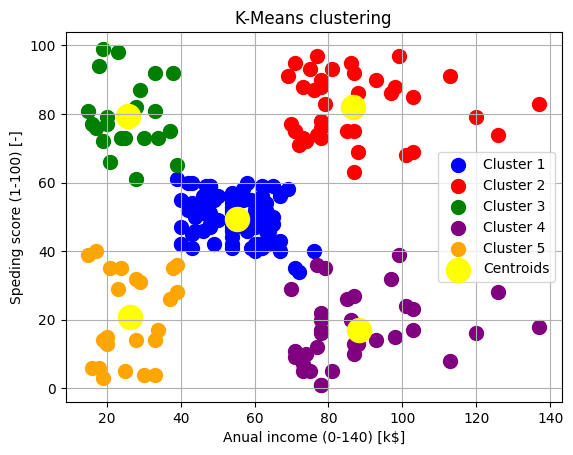

In [86]:
plt.xlabel("Anual income (0-140) [k$]")
plt.ylabel("Speding score (1-100) [-]")
plt.title("K-Means clustering")
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, color="blue", label="Cluster 1")
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, color="red", label="Cluster 2")
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, color="green", label="Cluster 3")
plt.scatter(X[y==3, 0], X[y==3, 1], s=100, color="purple", label="Cluster 4")
plt.scatter(X[y==4, 0], X[y==4, 1], s=100, color="orange", label="Cluster 5")
plt.scatter(k_means_model.cluster_centers_[:, 0], k_means_model.cluster_centers_[:, 1], s=300, color="yellow", label="Centroids")
plt.grid(True)
plt.legend()
plt.savefig("K-Means_clustering.jpg")